## GRIP : The Sparks Foundation 

### Task 2 : Prediction using Unsupervised ML

#### Problem Statement :  given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

#### Author : Nimma Shravan Kumar Reddy

In [33]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd 
import seaborn as sns

In [30]:
# Reading the data
iris = pd.read_csv("C:/Users/Admin/Downloads/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
iris.shape

(150, 5)

In [32]:
# Info about data
iris.info()                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


####  As we can see that there are no null values so we can use the data as it is.

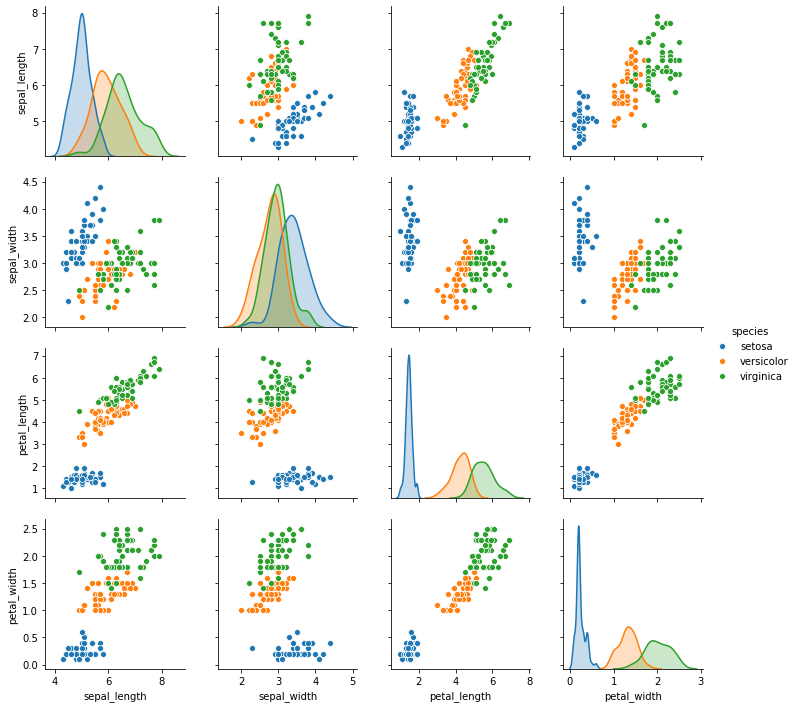

In [34]:
# using pair plot to visualize the attribute dependency on each other

sns.pairplot(iris, hue= 'species')

#### We can easily identify that "setosa" makes a distinctive cluster in every plot. While the other two are overlapping a bit on each other.

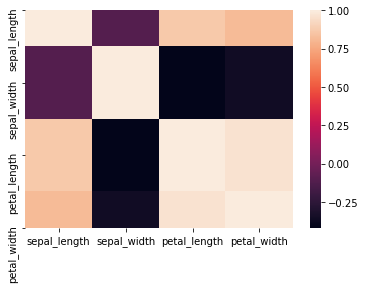

In [35]:
# Correlation matrix
sns.heatmap(iris.corr())

#### Observations
<ul>
<li>Sepal width is not related to Sepal length</li>
<li>Petal length is highly related to Petal width</li>
</ul>

In [37]:
x = iris.iloc[:,[0,1,2,3]].values

#### Finding optimum number of clusters for K Means, also determining the value of K 

<ul>A popular method known as <b>elbow method</b> is used to determine the optimal value of K to perform K-Means clustering algorithm. The basic idea behind the method is that it plots the various values of cost with changing K as the value of K increases there will be fewer elements in cluster. <ul>

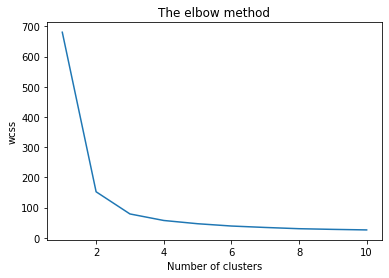

In [40]:
# Finding optimum number of clusters
from sklearn.cluster import KMeans
# within cluster sum of squares
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init = 10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the result onto a line graph
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

#### The optimum clusters is where the elbow occurs this is when the within-cluster sum of squares (wcss) doesn't deecrese significantly every iteration

#### So we choose the number of cluster as 3

In [41]:
# Creating the Kmeans classifier
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### Visualising the clusters 

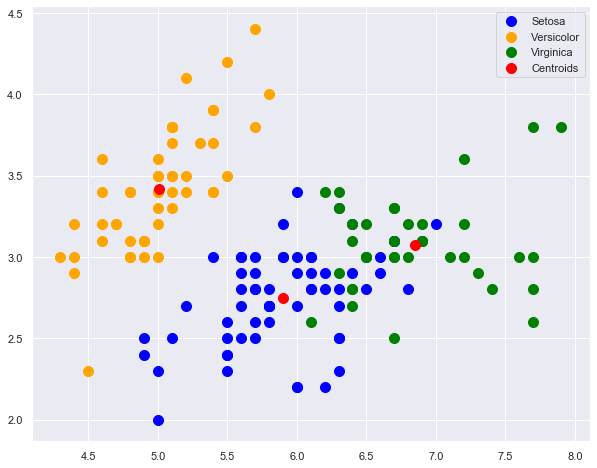

In [50]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='blue', label='Setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='orange', label='Versicolor')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Virginica')

# Plotting the centriods of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label='Centroids')
plt.legend()
sns.set(rc={'figure.figsize':(10,8)})

### Thank You For Watching 